# 🛒 Walmart Sales Forecasting

This notebook explores and analyzes weekly sales data from Walmart stores across the country.

## 📌 Objective

- Understand trends, seasonality, and patterns in weekly sales
- Analyze the impact of external factors like temperature, fuel price, CPI, and unemployment
- Identify top/worst performing stores
- Prepare the data for forecasting sales for the next 12 weeks

📅 Data covers multiple stores over time with weekly granularity.



************************************************************************

### Importing libraries

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading the data

In [26]:
df = pd.read_csv('Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [27]:
df.info() #getting an overview of columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### Converting to datetime keeping the DD-MM-YYYY format and sorting the dataset by the Date colun

In [28]:
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df.sort_values("Date",inplace=True)


In [29]:
df.isnull().sum() #checking for missing values

Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64

### Checking for outliers

<Axes: >

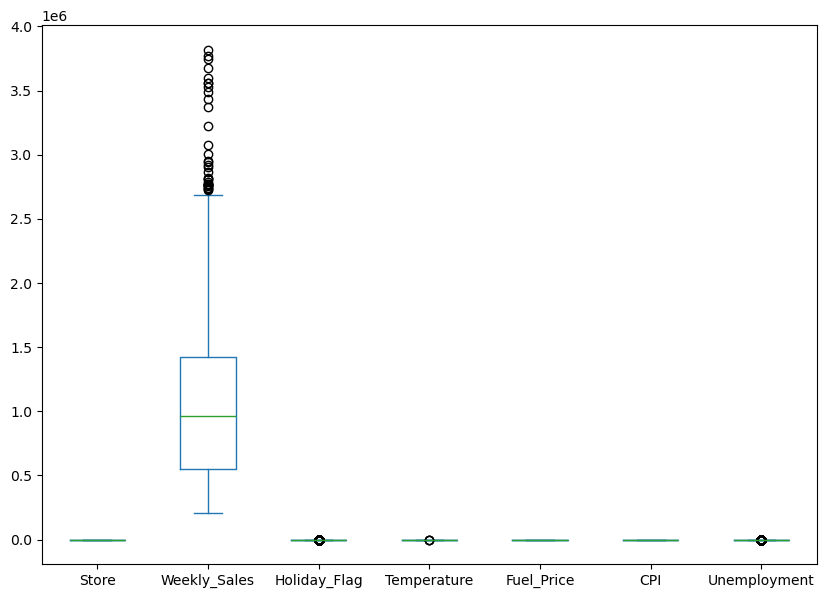

In [30]:
df.plot(kind='box', figsize=(10,7))

### Using IQR method to filter outliers


In [31]:
for col in df.columns:
    q1 = df[col].quantile(0.25)  
    q3 = df[col].quantile(0.75)  
    iqr = q3 - q1                
    ul = q3 + 1.5 * iqr          
    ll = q1 - 1.5 * iqr          
    df = df[(df[col] >= ll) & (df[col] <= ul)]  

### Visualising distribution for the target column

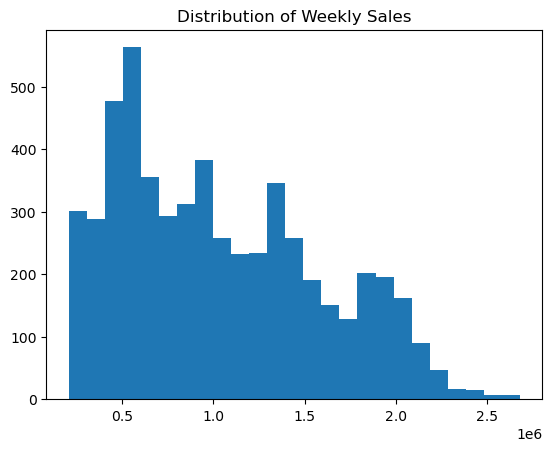

In [32]:
plt.hist(df['Weekly_Sales'], bins=25)
plt.title('Distribution of Weekly Sales')
plt.show()

In [33]:
df.duplicated().sum() #checking for duplicate rows

0